In [1]:
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
v = CountVectorizer(ngram_range = (1,4))
v.fit(["I love to play with data and its forms"])
v.vocabulary_

{'love': 10,
 'to': 18,
 'play': 14,
 'with': 22,
 'data': 3,
 'and': 0,
 'its': 8,
 'forms': 7,
 'love to': 11,
 'to play': 19,
 'play with': 15,
 'with data': 23,
 'data and': 4,
 'and its': 1,
 'its forms': 9,
 'love to play': 12,
 'to play with': 20,
 'play with data': 16,
 'with data and': 24,
 'data and its': 5,
 'and its forms': 2,
 'love to play with': 13,
 'to play with data': 21,
 'play with data and': 17,
 'with data and its': 25,
 'data and its forms': 6}

In [3]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [4]:
#preprocessing
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocessing(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)


In [5]:
corpus_processed = [preprocessing(text) for text in corpus]

In [6]:
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [7]:
v = CountVectorizer(ngram_range = (1,4))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 8,
 'eat': 0,
 'pizza': 6,
 'thor eat': 9,
 'eat pizza': 1,
 'thor eat pizza': 10,
 'loki': 2,
 'tall': 7,
 'loki tall': 5,
 'loki eat': 3,
 'loki eat pizza': 4}

In [8]:
#vectorization

In [9]:
v.transform(['thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]], dtype=int64)

In [10]:
import pandas as pd
df = pd.read_json("news_dataset.json")
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [11]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [12]:
#it is imbalanced dataset we use UNDERSAMPLING taking min value here is science

In [13]:
min_sample = 1381
df_business = df[df.category == "BUSINESS"].sample(min_sample, random_state = 1000)
df_sports = df[df.category == "SPORTS"].sample(min_sample, random_state = 1000)
df_crime = df[df.category == "CRIME"].sample(min_sample, random_state = 1000)
df_science = df[df.category == "SCIENCE"].sample(min_sample, random_state = 1000)

In [14]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science])

In [15]:
df_balanced['category'].value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [16]:
type(df_balanced.text)

pandas.core.series.Series

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_balanced['category_num'] = df_balanced.category.map({
    "BUSINESS" : 0,
    "SPORTS" : 1,
    "CRIME" : 2,
    "SCIENCE" : 3
})

In [19]:
df_balanced.head()

,text,category,category_num
5318,The Job Market Is Still Years Away From A Full...,BUSINESS,0
6286,Establishing a Solid Legal Foundation for Your...,BUSINESS,0
3320,"Gender Diversity on Boards: Good, Bad or Indif...",BUSINESS,0
2844,Volunteering Surprisingly Makes You Feel Like ...,BUSINESS,0
9903,How Managers Can Hire Employees More Effectively,BUSINESS,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state =1000,
    stratify = df_balanced.category_num
)

In [21]:
X_train.shape


(4419,)

In [22]:
X_train.head()

8669     Here's How Long It Would Take To Fall Through ...
10962    Tony Hawk Does A '900' At Age 48 Because He's ...
9543     10 Things Entrepreneurs Do Differently Than Me...
6728     In A Win For Waymo, Judge Rules Uber Lawsuit W...
588      Matt Barnes Is Probably Going To Hear More ‘De...
Name: text, dtype: object

In [23]:
y_train.value_counts() #stratify sample from  all classes are similar

1    1105
0    1105
2    1105
3    1104
Name: category_num, dtype: int64

In [24]:
y_test.value_counts()

3    277
2    276
1    276
0    276
Name: category_num, dtype: int64

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf  = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       276
           1       0.87      0.81      0.84       276
           2       0.85      0.90      0.87       276
           3       0.91      0.77      0.83       277

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf  = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80       276
           1       0.89      0.79      0.84       276
           2       0.86      0.89      0.88       276
           3       0.93      0.71      0.81       277

    accuracy                           0.83      1105
   macro avg       0.85      0.83      0.83      1105
weighted avg       0.85      0.83      0.83      1105



In [28]:
X_test[:5]

82       Dylann Roof Mentally Competent To Stand Trial,...
1351     Harbaugh Gone, 49ers Hunt for New Head Coach I...
11059                               Stocks Crash In Dubai 
4290     Will NASA Really Take Humans to Mars in the 20...
4523     'Every Corner' Of MSU Will Be Investigated Fol...
Name: text, dtype: object

In [29]:
y_test[:5]

82       2
1351     1
11059    0
4290     3
4523     1
Name: category_num, dtype: int64

In [30]:
y_pred[:5]

array([2, 1, 0, 3, 1], dtype=int64)

In [32]:
df_balanced['preprocessing_txt'] = df_balanced.text.apply(preprocessing)

In [33]:
df_balanced.head()

,text,category,category_num,preprocessing_txt
5318,The Job Market Is Still Years Away From A Full...,BUSINESS,0,Job Market year away Recovery
6286,Establishing a Solid Legal Foundation for Your...,BUSINESS,0,establish solid Legal Foundation business trad...
3320,"Gender Diversity on Boards: Good, Bad or Indif...",BUSINESS,0,Gender Diversity board good Bad Indifferent
2844,Volunteering Surprisingly Makes You Feel Like ...,BUSINESS,0,volunteer surprisingly make feel like free Time
9903,How Managers Can Hire Employees More Effectively,BUSINESS,0,manager hire employee effectively


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessing_txt,
    df_balanced.category_num,
    test_size = 0.2,
    random_state =1000,
    stratify = df_balanced.category_num
)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf  = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       276
           1       0.89      0.82      0.85       276
           2       0.84      0.92      0.88       276
           3       0.92      0.80      0.85       277

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [39]:
! pip install confusion_matrix

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for confusion_matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2407 sha256=8d272008f977fb2920771d53d1d146e7ddb6391b14cb935fa233015d7a9ad94e
  Stored in directory: c:\users\sriva\appdata\local\pip\cache\wheels\ac\84\3c\16054ec918dfe3851f5e9f8a663b3ada080411784df12e33ec
Successfully built confusion_matrix


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[250,  10,  11,   5],
       [ 13, 226,  27,  10],
       [  8,   8, 255,   5],
       [ 36,  11,   9, 221]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

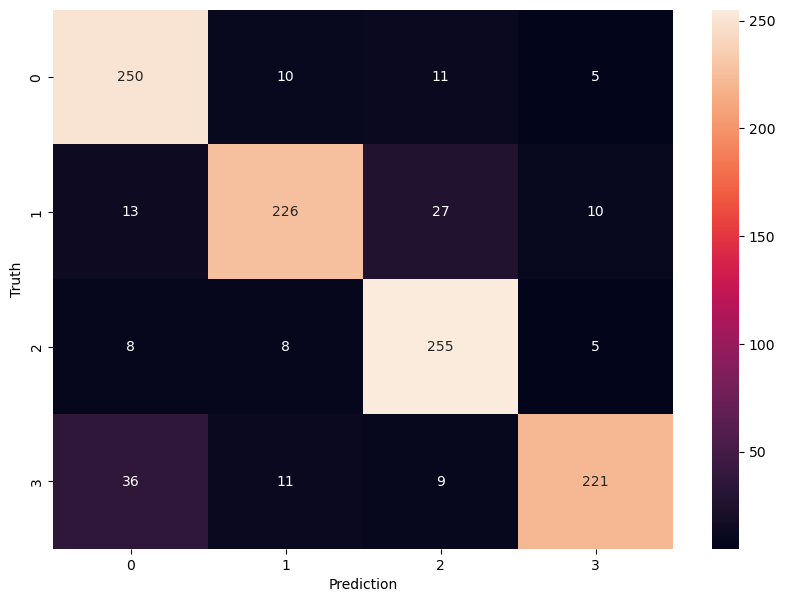

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')